In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from matplotlib import cm
import matplotlib.pyplot as plt
import random
import networkx as nx
from scipy.spatial import distance
from scipy import interpolate
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from pynmmso import Nmmso

In [7]:
def birastrigin(x, y, z):
    mu = 2.5
    s = 1 - (1/(2*np.sqrt(23)-8.2))
    mu_2 = np.sqrt(abs((mu**2 - 1)/s))
    sum_1 = 3 - np.cos(2*np.pi*(x-mu)) - np.cos(2*np.pi*(y-mu)) - np.cos(2*np.pi*(z-mu))
    sum_2 = (x-mu)**2 + (y-mu)**2 + (z-mu)**2
    sum_3 = (x-mu_2)**2 + (y-mu_2)**2 + (z-mu_2)**2
    return 10*sum_1 + min(sum_2, 3 + s*sum_3)

In [8]:
class BirastriginMax:
    @staticmethod
    def fitness(params):
        x = params[0]
        y = params[1]
        z = params[2]
        mu = 2.5
        s = 1 - (1/(2*np.sqrt(23)-8.2))
        mu_2 = np.sqrt(abs((mu**2 - 1)/s))
        sum_1 = 3 - np.cos(2*np.pi*(x-mu)) - np.cos(2*np.pi*(y-mu)) - np.cos(2*np.pi*(z-mu))
        sum_2 = (x-mu)**2 + (y-mu)**2 + (z-mu)**2
        sum_3 = (x-mu_2)**2 + (y-mu_2)**2 + (z-mu_2)**2
        return 10*sum_1 + min(sum_2, 3 + s*sum_3)

    @staticmethod
    def get_bounds():
        return [-5.12, -5.12, -5.12], [5.12, 5.12, 5.12]

class BirastriginMin:
    @staticmethod
    def fitness(params):
        x = params[0]
        y = params[1]
        z = params[2]
        mu = 2.5
        s = 1 - (1/(2*np.sqrt(23)-8.2))
        mu_2 = np.sqrt(abs((mu**2 - 1)/s))
        sum_1 = 3 - np.cos(2*np.pi*(x-mu)) - np.cos(2*np.pi*(y-mu)) - np.cos(2*np.pi*(z-mu))
        sum_2 = (x-mu)**2 + (y-mu)**2 + (z-mu)**2
        sum_3 = (x-mu_2)**2 + (y-mu_2)**2 + (z-mu_2)**2
        return -(10*sum_1 + min(sum_2, 3 + s*sum_3))

    @staticmethod
    def get_bounds():
        return [-5.12, -5.12, -5.12], [5.12, 5.12, 5.12]

In [9]:
func_values_matching_optima = []

In [10]:
maxs_found = []

number_of_fitness_evaluations = 10000

nmmso = Nmmso(BirastriginMax())
my_result = nmmso.run(number_of_fitness_evaluations)
for mode_result in my_result:
    maxs_found.append(mode_result.location)
    func_values_matching_optima.append(mode_result.value)

In [11]:
print('The {0} maxima found are:'.format(len(maxs_found)))
np.around(maxs_found, 2)

The 88 maxima found are:


array([[-1.02,  1.99,  1.  ],
       [-4.01,  5.  ,  5.  ],
       [-5.01, -3.01,  3.  ],
       [ 0.97, -3.  , -5.01],
       [-4.99, -3.01, -3.01],
       [ 5.  ,  2.  , -4.01],
       [ 3.98,  3.  ,  0.99],
       [ 3.01,  0.94, -2.01],
       [-1.02,  1.97, -3.08],
       [ 4.99,  3.  ,  1.  ],
       [-5.01, -1.99,  1.  ],
       [ 5.  , -5.01, -5.01],
       [-2.96, -4.96, -3.02],
       [-1.01,  2.  , -4.01],
       [-3.95, -4.02, -5.04],
       [ 4.  , -2.01, -5.01],
       [ 3.99, -4.01, -1.01],
       [ 5.  ,  1.99,  0.99],
       [ 4.01,  2.  ,  0.99],
       [ 4.01, -5.01, -5.01],
       [ 5.  ,  4.  ,  0.99],
       [-0.  ,  2.  , -4.01],
       [-3.01,  3.  , -3.  ],
       [ 4.04,  1.98, -0.02],
       [-5.01, -3.01,  2.  ],
       [ 4.  ,  3.  ,  5.  ],
       [-3.01, -2.01,  5.  ],
       [ 4.  ,  2.  ,  4.  ],
       [-1.01, -2.04, -4.05],
       [-1.04,  4.  , -4.99],
       [-1.01, -5.01,  5.  ],
       [-4.01, -1.01,  0.99],
       [-4.94, -5.03,  4.02],
       [-4

In [12]:
mins_found = []

number_of_fitness_evaluations = 10000

nmmso = Nmmso(BirastriginMin())
my_result = nmmso.run(number_of_fitness_evaluations)
for mode_result in my_result:
    mins_found.append(mode_result.location)
    func_values_matching_optima.append(-mode_result.value)

In [13]:
print('The {0} minima found are:'.format(len(mins_found)))
np.around(mins_found, 2)

The 90 minima found are:


array([[-0.49, -1.49, -1.48],
       [-0.48,  4.51, -0.48],
       [ 3.5 ,  3.53, -2.44],
       [ 3.54, -0.48, -2.49],
       [ 0.51,  0.5 , -4.49],
       [-2.49,  1.51, -3.48],
       [-1.49,  0.5 ,  4.51],
       [ 2.5 , -1.49,  2.51],
       [ 0.35, -2.53, -3.45],
       [-1.44,  2.59, -3.37],
       [-0.49,  2.5 , -3.49],
       [-1.53,  4.51,  4.55],
       [-0.5 ,  2.5 , -2.49],
       [ 2.54, -4.5 , -0.54],
       [ 2.45,  4.51, -4.47],
       [ 2.48, -1.49,  0.51],
       [-0.49, -1.49,  3.5 ],
       [-1.48, -2.48,  1.5 ],
       [ 0.5 , -1.5 ,  2.5 ],
       [-1.49,  3.53,  1.49],
       [ 3.51,  2.56, -0.61],
       [ 2.5 ,  2.48, -1.31],
       [ 3.56,  1.54,  2.43],
       [ 2.65, -4.3 , -0.53],
       [ 1.5 , -3.45,  4.42],
       [-1.49, -2.49,  3.5 ],
       [-1.49,  4.51, -4.47],
       [ 0.5 ,  3.52,  2.48],
       [-0.53,  3.44,  4.53],
       [-1.49, -1.49,  3.5 ],
       [ 0.38, -3.44,  3.38],
       [ 3.5 , -2.49,  0.51],
       [-1.5 ,  4.51,  3.49],
       [-2

In [14]:
optima = np.stack(mins_found + maxs_found, axis=0)

In [15]:
to_label = list(optima)
label_ind = [i for i in range(len(to_label))]

In [18]:
edges = []
for i in range(len(optima)):
    for j in range(len(optima)):
        if i != j:
            dist = distance.euclidean(optima[i, :], optima[j, :])
            if dist < 1:  ## Distance chosen arbitrarily
                if (min(i,j), max(i,j)) not in edges:
                    edges.append((i,j))

In [20]:
def intermediates(p1, p2, nb_points=50):
    x_spacing = (p2[0] - p1[0]) / (nb_points + 1)
    y_spacing = (p2[1] - p1[1]) / (nb_points + 1)
    z_spacing = (p2[2] - p1[2]) / (nb_points + 1)

    return [[p1[0] + i * x_spacing, p1[1] +  i * y_spacing, p1[2] +  i * z_spacing] 
            for i in range(1, nb_points+1)]

new_data = []
for i in range(len(optima)):
    new_data.append(optima[i,:])
for edge in edges:
    pos_node_1 = optima[edge[0], :]
    pos_node_2 = optima[edge[1], :]
    new_nodes = intermediates(pos_node_1, pos_node_2)
    to_label.append(new_nodes[9])
    to_label.append(new_nodes[19])
    to_label.append(new_nodes[29])
    to_label.append(new_nodes[39])
    label_ind += [len(new_data)+9, len(new_data)+19, len(new_data)+29, len(new_data)+39]
    for node in new_nodes:
        new_data.append(np.array(node))

In [21]:
scaler = MinMaxScaler()
new_data_scaled = scaler.fit_transform(new_data)

In [22]:
mds = MDS(2, random_state=0)
mds_new_data = mds.fit_transform(new_data_scaled)

In [23]:
G = nx.Graph()
G.add_nodes_from([i for i in range(len(new_data))])

In [24]:
x = mds_new_data[:, 0]
y = mds_new_data[:, 1]

pos = {i: [x[i], y[i]] for i in range(len(new_data))}

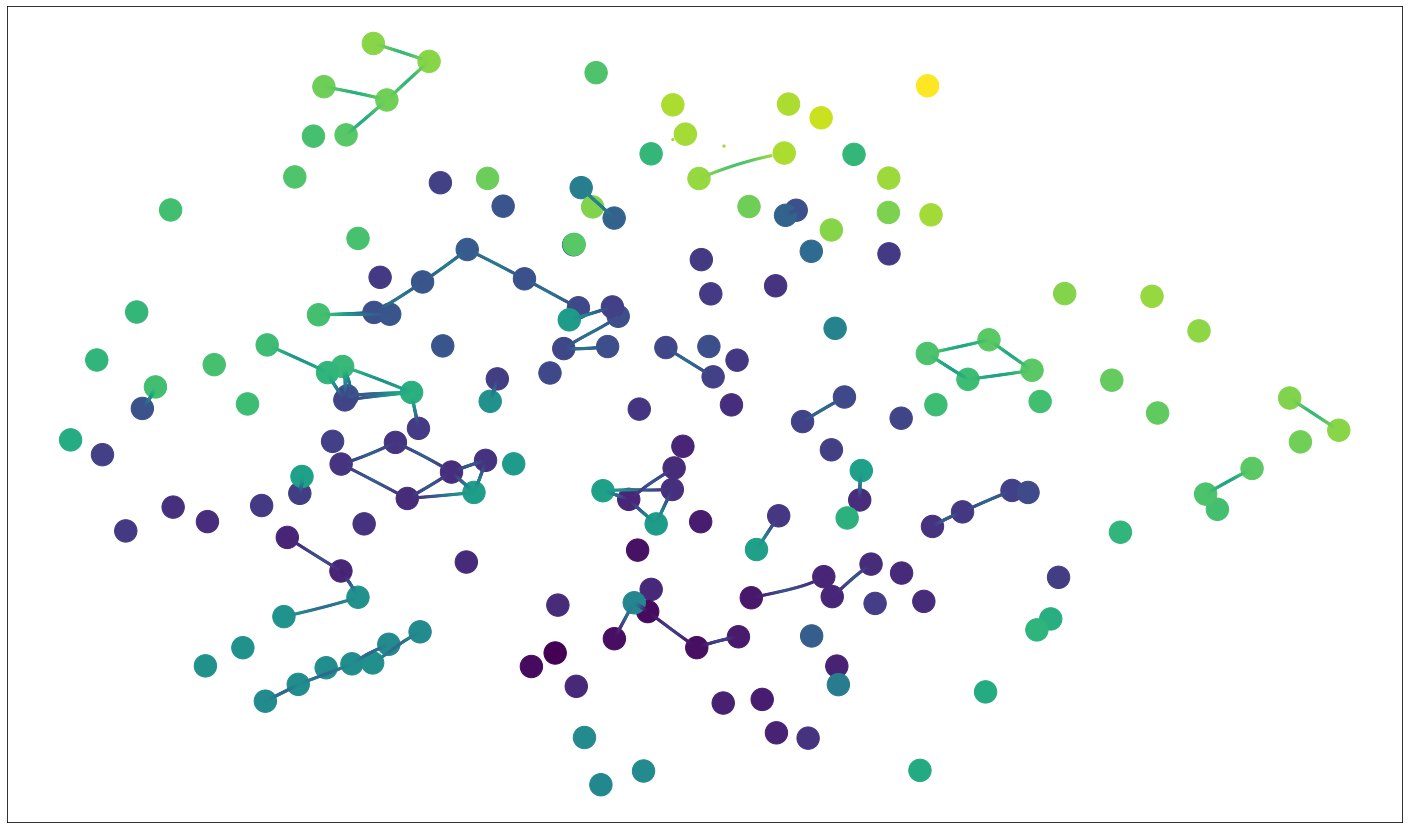

In [26]:
plt.rcParams['figure.figsize'] = [25, 15]

node_sizes = [500 for _ in range(178)] + [5 for _ in range(G.number_of_nodes() - 178)]

func_val_map = {i: birastrigin(new_data[i][0], new_data[i][1], new_data[i][2]) for i in range(len(new_data))}

values = [func_val_map[node] for node in G.nodes()]

fig, ax = plt.subplots()
nx.draw(G, pos=pos, ax=ax, node_size=node_sizes, node_color=values)
# for i, opt in enumerate(optima):
#     plt.annotate(str(np.around(opt, 2)), (x[i], y[i]), xytext=(x[i]+0.03, y[i]+0.03), size=8)
limits=plt.axis('on')
plt.show()